In [525]:
#Loading Libraries
import pandas as pd
import os

#import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from pathlib import Path #Why? This is to import the data as path
from datetime import date #Why
from pandas.tseries.offsets import MonthEnd #Why

#import the Data
stuff = Path('/Users/lindsaytruax/Desktop/SQL/Capstone_Projects/Capstone_2/USRealEstateTrends.csv')
df = pd.read_csv(stuff)

In [527]:
#identifying columns 
df.columns

Index(['RegionID', 'SizeRank', 'RegionName', 'StateName', '2018-02-HomeValue',
       '2018-02-DaysPending', '2018-02-CutRaw', '2018-03-HomeValue',
       '2018-03-DaysPending', '2018-03-CutRaw',
       ...
       '2024-02-CutRaw', '2024-03-HomeValue', '2024-03-DaysPending',
       '2024-03-CutRaw', '2024-04-HomeValue', '2024-04-DaysPending',
       '2024-04-CutRaw', '2024-05-HomeValue', '2024-05-DaysPending',
       '2024-05-CutRaw'],
      dtype='object', length=232)

In [529]:
#rename column name
df.rename(index=str, columns={'RegionName' : 'Location', 'StateName':'State'}, inplace=True)

#dropping the not needed 
df.dropna(inplace=True)

#identifying missing values
df.isna().sum()

#melting data for graphing
df_melted = pd.melt(df, id_vars=['RegionID', 'SizeRank','Location','State'],
                    var_name='Date_Measure',
                    value_name='Value')
df_melted.head(3)

,RegionID,SizeRank,Location,State,Date_Measure,Value
0,394913,1,"New York, NY",NY,2018-02-HomeValue,468313.430126
1,753899,2,"Los Angeles, CA",CA,2018-02-HomeValue,629019.165765
2,394463,3,"Chicago, IL",IL,2018-02-HomeValue,229741.266973


In [531]:
#focusing Date_Measure for graphing purposes 
df_melted[['Year', 'Month_Measure']] = df_melted['Date_Measure'].str.split('-', expand=True, n=1)
df_melted.drop(columns=['Date_Measure'], inplace=True)
df_melted.head(5)

,RegionID,SizeRank,Location,State,Value,Year,Month_Measure
0,394913,1,"New York, NY",NY,468313.430126,2018,02-HomeValue
1,753899,2,"Los Angeles, CA",CA,629019.165765,2018,02-HomeValue
2,394463,3,"Chicago, IL",IL,229741.266973,2018,02-HomeValue
3,394514,4,"Dallas, TX",TX,241533.231800,2018,02-HomeValue
4,394692,5,"Houston, TX",TX,208651.872272,2018,02-HomeValue


In [533]:
#Sep. Month and Measure
df_melted[['Month', 'Measure']] = df_melted['Month_Measure'].str.split('-', expand=True, n=1)
df_melted.drop(columns=['Month_Measure'], inplace=True)
df_melted.head(5)

,RegionID,SizeRank,Location,State,Value,Year,Month,Measure
0,394913,1,"New York, NY",NY,468313.430126,2018,02,HomeValue
1,753899,2,"Los Angeles, CA",CA,629019.165765,2018,02,HomeValue
2,394463,3,"Chicago, IL",IL,229741.266973,2018,02,HomeValue
3,394514,4,"Dallas, TX",TX,241533.231800,2018,02,HomeValue
4,394692,5,"Houston, TX",TX,208651.872272,2018,02,HomeValue


In [535]:
#print([col for col in df.columns if '2018' in col])

In [537]:
# Pivot the DataFrame to have measures as columns
df_reorganized = df_melted.pivot_table(index=['RegionID','SizeRank','Location','State','Year','Month'] 	,
                                       columns='Measure', values='Value').reset_index()
df_reorganized.head(5)

Measure,RegionID,SizeRank,Location,State,Year,Month,CutRaw,DaysPending,HomeValue
0,394308,64,"Albany, NY",NY,2018,02,5100.0,64.0,218876.519605
1,394308,64,"Albany, NY",NY,2018,03,7000.0,62.0,219792.863791
2,394308,64,"Albany, NY",NY,2018,04,8000.0,54.0,220505.058669
3,394308,64,"Albany, NY",NY,2018,05,9000.0,45.0,221526.705984
4,394308,64,"Albany, NY",NY,2018,06,9100.0,47.0,222479.931387


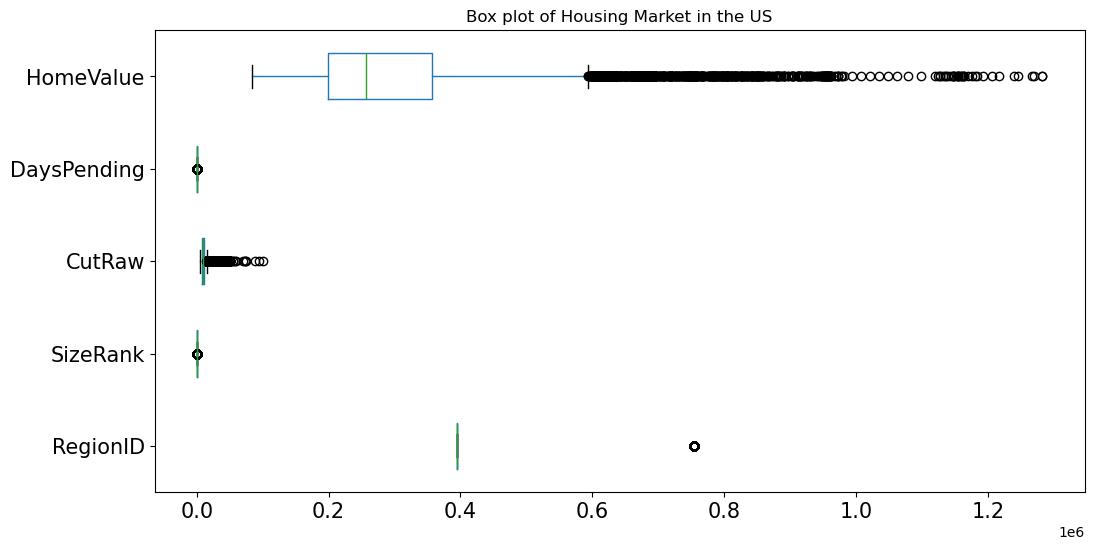

In [539]:
#creating a box plot of every column in newly reorganized df
plt.figure(figsize=(12,6))
df_reorganized.boxplot(grid=False, vert=False, fontsize=15)

plt.title('Box plot of Housing Market in the US')
plt.show()

In [541]:
#Pull frame by State CA
CA_df = df_reorganized.loc[df_reorganized['State'] == 'CA']
print(CA_df.head())

#Calculate the mean for CA
avg_value_ca = CA_df.groupby(CA_df['Year'])['HomeValue'].mean().reset_index()
print(avg_value_ca)

#Now it's Texas
TX_df = df_reorganized.loc[df_reorganized['State'] == 'TX']
print(TX_df.head())

#Calculate the mean for TX
avg_value_TX = TX_df.groupby(TX_df['Year'])['HomeValue'].mean().reset_index()
print(avg_value_TX)

Measure  RegionID  SizeRank         Location State  Year Month  CutRaw  \
304        394357        63  Bakersfield, CA    CA  2018    02  7000.0   
305        394357        63  Bakersfield, CA    CA  2018    03  7100.0   
306        394357        63  Bakersfield, CA    CA  2018    04  6000.0   
307        394357        63  Bakersfield, CA    CA  2018    05  7600.0   
308        394357        63  Bakersfield, CA    CA  2018    06  8000.0   

Measure  DaysPending      HomeValue  
304             51.0  212531.666950  
305             48.0  213905.260766  
306             46.0  214996.109254  
307             47.0  216057.814209  
308             48.0  217117.256125  
   Year      HomeValue
0  2018  506040.695709
1  2019  517263.554665
2  2020  537864.725667
3  2021  618509.429785
4  2022  692916.916176
5  2023  678784.189582
6  2024  698308.669124
Measure  RegionID  SizeRank      Location State  Year Month  CutRaw  \
532        394372       140  Beaumont, TX    TX  2018    02  9810.0   
5

In [543]:
CA_df['Date'] = pd.to_datetime(CA_df['Year'].astype(str) + '-' + CA_df['Month'].astype(str))
print(CA_df['Date'].head())

TX_df['Date'] = pd.to_datetime(TX_df['Year'].astype(str) + '-' + TX_df['Month'].astype(str))
print(TX_df['Date'].head())

304   2018-02-01
305   2018-03-01
306   2018-04-01
307   2018-05-01
308   2018-06-01
Name: Date, dtype: datetime64[ns]
532   2018-02-01
533   2018-03-01
534   2018-04-01
535   2018-05-01
536   2018-06-01
Name: Date, dtype: datetime64[ns]


/var/folders/k5/pw4j05rj6v5f9rxlvmxw5k580000gn/T/ipykernel_81940/1893758131.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/var/folders/k5/pw4j05rj6v5f9rxlvmxw5k580000gn/T/ipykernel_81940/1893758131.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/k5/pw4j05rj6v5f9rxlvmxw5k580000gn/T/ipykernel_81940/1893758131.py:4: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/var/folders/k5/pw4j05rj6v5f9rxlvmxw5k580000gn/T/ipykernel_81940/1893758131.py:4: SettingWit

/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



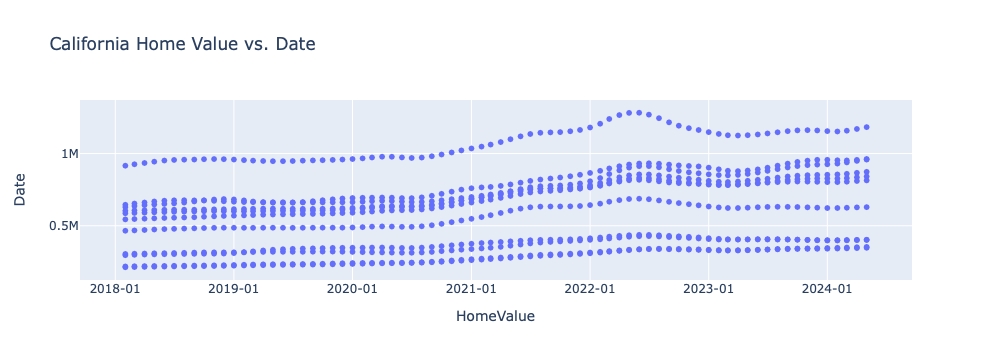

In [545]:
#https://plotly.com/python/line-and-scatter/
#fig = px.scatter(df, x="sepal_width", y="sepal_length")

fig = px.scatter(
    CA_df, 
    x='Date',
    y='HomeValue',
    hover_data={'Location':True, 'HomeValue':True},
    title='Cost of the Homes in California',
    labels={'x': 'Date', 'y': 'HomeValue'}
)

fig.update_layout(
    xaxis_title='HomeValue',
    yaxis_title='Date',
    title='California Home Value vs. Date',
    xaxis=dict(
        tickformat='%Y-%m',
        showgrid=True
    ),
    yaxis=dict(
        showgrid=True
    )
)
fig.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



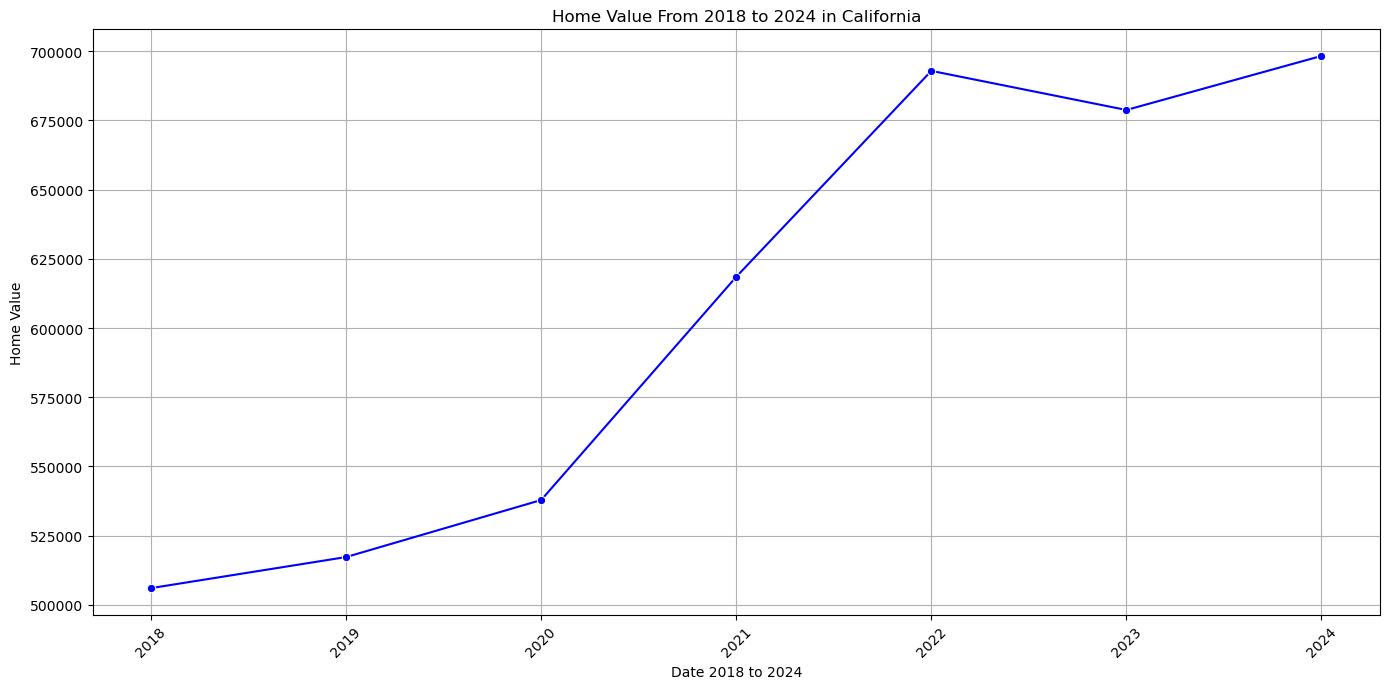

In [547]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_value_ca, x='Year', y='HomeValue', marker='o', color='blue')

# Customize the plot
plt.title('Home Value From 2018 to 2024 in California')
plt.xlabel('Date 2018 to 2024')
plt.ylabel('Home Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [549]:
#Pull data from the year 2018
#Mean of Homevaue in 2018 VS 2024
Ca_df_2018 = CA_df[CA_df['Date'].dt.year ==2018]
CA_2018_mean = Ca_df_2018['HomeValue'].mean()
print(CA_2018_mean)

506040.69570894906


In [551]:
Ca_df_2024 = CA_df[CA_df['Date'].dt.year ==2024]
CA_2024_mean = Ca_df_2024['HomeValue'].mean()
print(CA_2024_mean)

698308.6691243352


In [553]:
#Compare the Mean of both dates and how much it increased for CA
difference_2018_to_2024 = (CA_2024_mean - CA_2018_mean)/2
print("This displays the increase of property value on average from 2018 to 2024 : $", difference_2018_to_2024.round(2))


This displays the increase of property value on average from 2018 to 2024 : $ 96133.99


In [559]:
#finding outliers in california

In [561]:
CA_Q1 = CA_df['HomeValue'].quantile(.25)
CA_Q3 = CA_df['HomeValue'].quantile(.75)
CA_IQR = CA_Q3 - CA_Q1 

lower_bound = CA_Q1 - 1.5 * CA_IQR
Upper_bound = CA_Q3 + 1.5 * CA_IQR

CA_Outliers = CA_df[(CA_df['HomeValue'] < lower_bound) | (CA_df['HomeValue'] > Upper_bound)]
print("Outliers in CA: ", CA_Outliers)

Outliers in CA:  Empty DataFrame
Columns: [RegionID, SizeRank, Location, State, Year, Month, CutRaw, DaysPending, HomeValue, Date]
Index: []


/opt/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



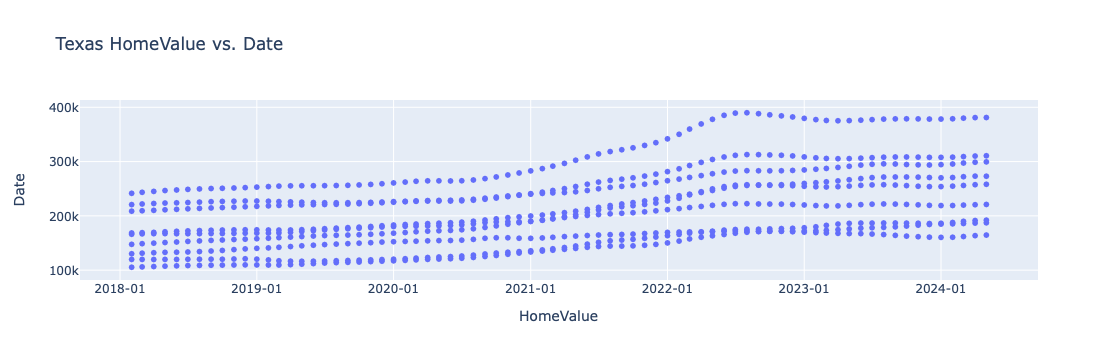

In [563]:
fig = px.scatter(
    TX_df, 
    x='Date',
    y='HomeValue',
    hover_data={'Location':True, 'HomeValue':True},
    title='Cost of the Homes in California',
    labels={'x': 'Date', 'y': 'HomeValue'}
)

fig.update_layout(
    xaxis_title='HomeValue',
    yaxis_title='Date',
    title='Texas HomeValue vs. Date',
    xaxis=dict(
        tickformat='%Y-%m',
        showgrid=True
    ),
    yaxis=dict(
        showgrid=True
    )
)
fig.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



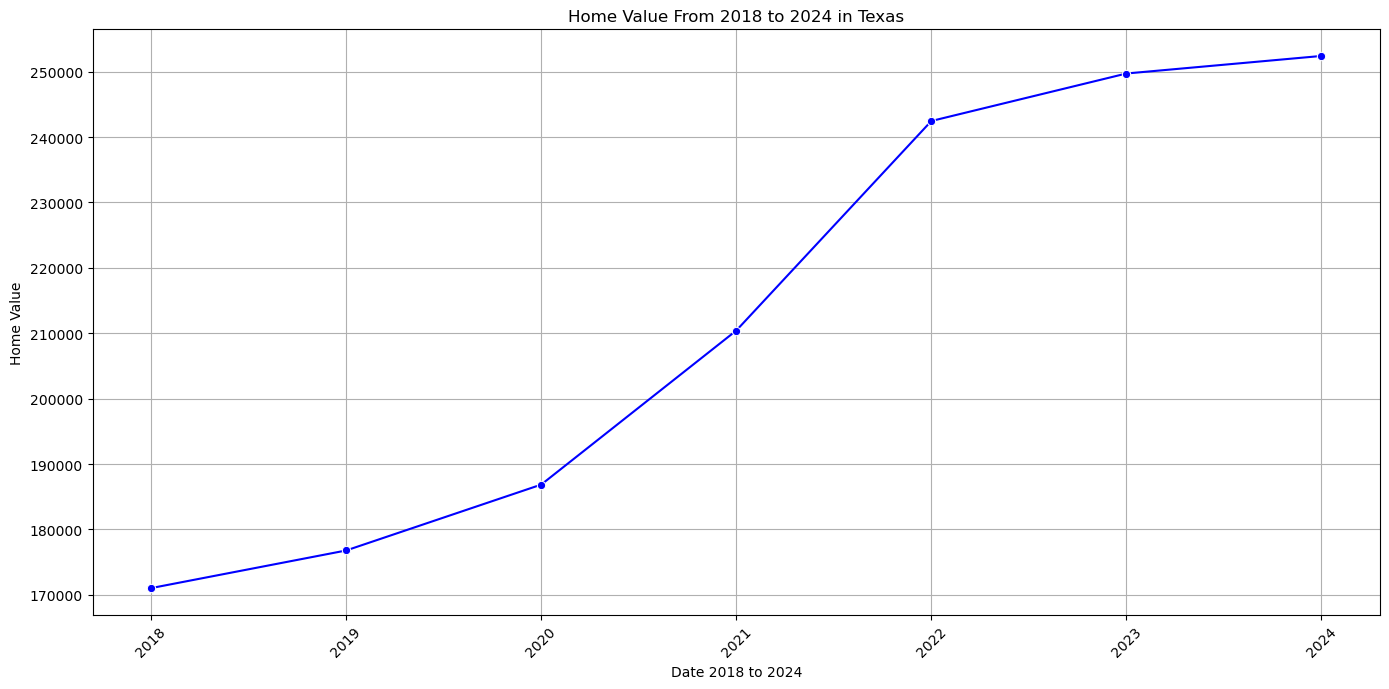

In [565]:
# now we use avg_value_TX
plt.figure(figsize=(14, 7))
sns.lineplot(data=avg_value_TX, x='Year', y='HomeValue', marker='o', color='blue')

# Customize the plot
plt.title('Home Value From 2018 to 2024 in Texas')
plt.xlabel('Date 2018 to 2024')
plt.ylabel('Home Value')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [567]:
#Have the Mean of TX 2018

TX_df_2018 = TX_df[TX_df['Date'].dt.year ==2018]
TX_2018_mean = TX_df_2018['HomeValue'].mean()
print("The Mean of Home Value in 2018: ", TX_2018_mean)

The Mean of Home Value in 2018:  171032.81836915622


In [569]:
#Have the Mean of TX 2024

TX_df_2024 = TX_df[TX_df['Date'].dt.year ==2024]
TX_2024_mean = TX_df_2024['HomeValue'].mean()
print("The Mean of Home Value in 2024: ",TX_2024_mean)

The Mean of Home Value in 2024:  252396.5948780523


In [571]:
#comparing the two means to see how TX property increased. 

difference_2018_to_2024_TX = (TX_2024_mean - TX_2018_mean)/2
print("This displays the increase of property value on average from 2018 to 2024 for Texas: $", difference_2018_to_2024_TX.round(2))


This displays the increase of property value on average from 2018 to 2024 for Texas: $ 40681.89


In [486]:
#Outliers in Texas

In [521]:
TX_Q1 = TX_df['HomeValue'].quantile(.25)
TX_Q3 = TX_df['HomeValue'].quantile(.75)
TX_IQR = TX_Q3 - TX_Q1 

lower_bound_TX = TX_Q1 - 1.5 * TX_IQR
Upper_bound_TX = TX_Q3 + 1.5 * TX_IQR

TX_Outliers = TX_df[(TX_df['HomeValue'] < lower_bound_TX) | (TX_df['HomeValue'] > Upper_bound_TX)]
print("Outliers in CA: ", TX_Outliers)

Outliers in CA:  Measure  RegionID  SizeRank    Location State  Year Month   CutRaw  \
2409       394514         4  Dallas, TX    TX  2022    07  14000.0   
2410       394514         4  Dallas, TX    TX  2022    08  10100.0   
2411       394514         4  Dallas, TX    TX  2022    09  10000.0   

Measure  DaysPending      HomeValue       Date  
2409            17.0  389253.412220 2022-07-01  
2410            25.0  389922.867312 2022-08-01  
2411            29.0  388206.257298 2022-09-01  


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



<Axes: xlabel='Year', ylabel='HomeValue'>

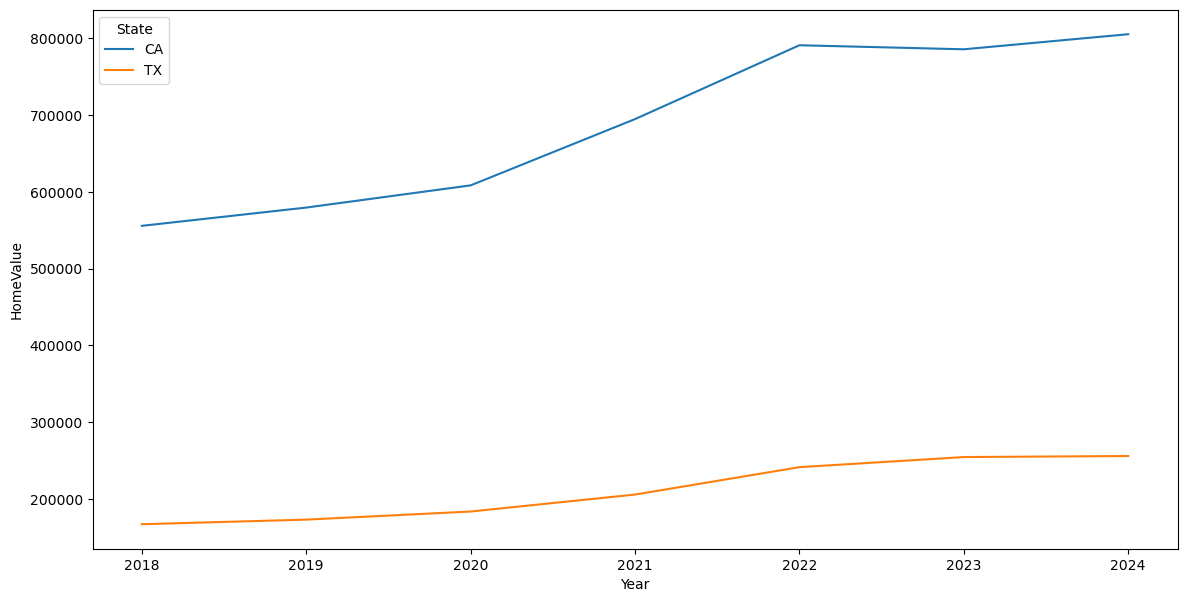

In [509]:
#Calculating the Median of Home Value
Median_HomeValue = df_reorganized.groupby(['Year','State'])['HomeValue'].median().reset_index()

#Gathering 
Texas_Cali = ['CA','TX']

#Gathering the Median of HomeValue
States_filtration= Median_HomeValue[Median_HomeValue['State'].isin(Texas_Cali)]

#plotting
plt.figure(figsize=(14,7))
sns.lineplot(data=States_filtration, x='Year', y='HomeValue', hue='State', markers='o')
